**Dataset utilizado - https://archive.ics.uci.edu/dataset/10/automobile**

In [2]:
from ucimlrepo import fetch_ucirepo 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

automobile = fetch_ucirepo(id=10) 
  
# data (as pandas dataframes) 
X = automobile.data.features 
y = automobile.data.targets 
  
# variable information 
automobile.variables


,name,role,type,demographic,description,units,missing_values
0,price,Feature,Continuous,None,continuous from 5118 to 45400,None,yes
1,highway-mpg,Feature,Continuous,None,continuous from 16 to 54,None,no
2,city-mpg,Feature,Continuous,None,continuous from 13 to 49,None,no
3,peak-rpm,Feature,Continuous,None,continuous from 4150 to 6600,None,yes
4,horsepower,Feature,Continuous,None,continuous from 48 to 288,None,yes
5,compression-ratio,Feature,Continuous,None,continuous from 7 to 23,None,no
6,stroke,Feature,Continuous,None,continuous from 2.07 to 4.17,None,yes
7,bore,Feature,Continuous,None,continuous from 2.54 to 3.94,None,yes
8,fuel-system,Feature,Categorical,None,"1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi",None,no
9,engine-size,Feature,Continuous,None,continuous from 61 to 326,None,no


In [3]:
X.loc[:, 'price'] = X['price'].fillna(X['price'].mean())


In [4]:
X.isna().sum()

price                 0
highway-mpg           0
city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
dtype: int64

In [5]:
X.loc[:, 'peak-rpm'] = X['peak-rpm'].fillna(X['peak-rpm'].mean())

In [6]:
X.isna().sum()

price                 0
highway-mpg           0
city-mpg              0
peak-rpm              0
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
dtype: int64

In [7]:
X.loc[:, 'horsepower'] = X['horsepower'].fillna(X['horsepower'].mean())

In [8]:
X.isna().sum()

price                 0
highway-mpg           0
city-mpg              0
peak-rpm              0
horsepower            0
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
dtype: int64

In [9]:
X.loc[:, 'stroke'] = X['stroke'].fillna(X['stroke'].mean())

In [10]:
X.isna().sum()

price                 0
highway-mpg           0
city-mpg              0
peak-rpm              0
horsepower            0
compression-ratio     0
stroke                0
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
dtype: int64

In [11]:
X.loc[:, 'bore'] = X['bore'].fillna(X['bore'].mean())

In [12]:
X.loc[:, 'num-of-doors'] = X['num-of-doors'].fillna(X['num-of-doors'].median())

In [13]:
X['normalized-losses']

0        NaN
1        NaN
2        NaN
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 205, dtype: float64

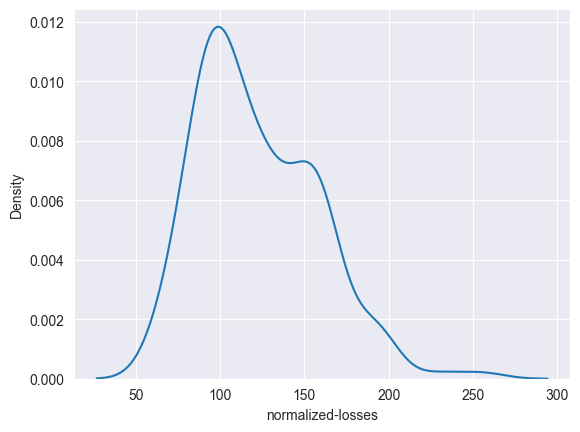

In [14]:
sns.kdeplot(X['normalized-losses'])
plt.show()

In [15]:
X.loc[:, 'normalized-losses'] = X['normalized-losses'].fillna(X['normalized-losses'].median())

In [16]:
X['normalized-losses'].value_counts()

normalized-losses
115.0    44
161.0    11
91.0      8
150.0     7
134.0     6
128.0     6
104.0     6
85.0      5
94.0      5
65.0      5
102.0     5
74.0      5
168.0     5
103.0     5
95.0      5
106.0     4
93.0      4
118.0     4
148.0     4
122.0     4
83.0      3
125.0     3
154.0     3
137.0     3
101.0     3
188.0     2
119.0     2
89.0      2
192.0     2
197.0     2
158.0     2
81.0      2
87.0      2
153.0     2
129.0     2
108.0     2
110.0     2
164.0     2
145.0     2
194.0     2
113.0     2
78.0      1
256.0     1
107.0     1
90.0      1
77.0      1
142.0     1
121.0     1
98.0      1
186.0     1
231.0     1
Name: count, dtype: int64

In [17]:
automobile_2 = fetch_ucirepo(id=10) 
X_2 = automobile_2.data.features 

In [18]:
X_2['normalized-losses']

0        NaN
1        NaN
2        NaN
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 205, dtype: float64

In [19]:
X.loc[:, 'normalized-losses'] = X_2['normalized-losses']

In [20]:
media_nl = X['normalized-losses'].mean()
print(media_nl)

122.0


In [21]:
X.loc[:, 'normalized-losses'] = X['normalized-losses'].fillna(media_nl)

In [22]:
del X_2
del automobile_2

<Axes: xlabel='normalized-losses', ylabel='symboling'>

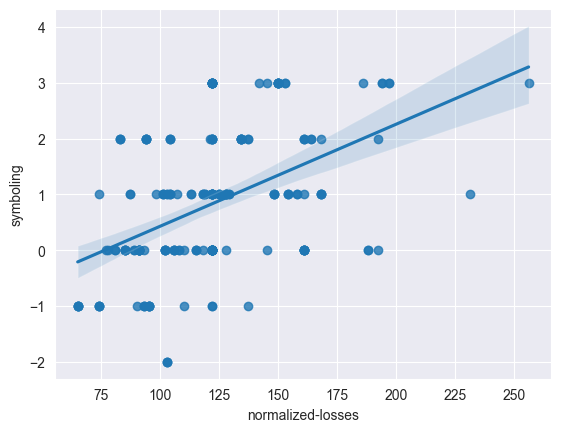

In [23]:
sns.regplot(x='normalized-losses', y='symboling', data=pd.concat([X, y], axis=1))


**Transformando STRINGS**


In [24]:
le = LabelEncoder()

In [25]:
X.loc[:, 'engine-location'] = le.fit_transform(X['engine-location'])
X['engine-location'].unique()

array([0, 1], dtype=object)

In [26]:
X.loc[:, 'make'] = le.fit_transform(X['make'])
X['make'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21], dtype=object)

In [27]:
X.loc[:, 'fuel-type'] = le.fit_transform(X['fuel-type'])
X['fuel-type'].unique()

array([1, 0], dtype=object)

In [28]:
X.loc[:, 'aspiration'] = le.fit_transform(X['aspiration'])
X['aspiration'].unique()

array([0, 1], dtype=object)

In [29]:
X.loc[:, 'num-of-doors'] = le.fit_transform(X['num-of-doors'])
X['num-of-doors'].unique()

array([0., 1.])

In [30]:
X.loc[:, 'body-style'] = le.fit_transform(X['body-style'])
X['body-style'].unique()

array([0, 2, 3, 4, 1], dtype=object)

In [31]:
X.loc[:, 'drive-wheels'] = le.fit_transform(X['drive-wheels'])
X['drive-wheels'].unique()

array([2, 1, 0], dtype=object)

In [32]:
X.loc[:, 'engine-type'] = le.fit_transform(X['engine-type'])
X['engine-type'].unique()

array([0, 5, 3, 2, 6, 4, 1], dtype=object)

In [33]:
X.loc[:, 'fuel-system'] = le.fit_transform(X['fuel-system'])
X['fuel-system'].unique()

array([5, 1, 4, 0, 7, 2, 3, 6], dtype=object)

In [34]:
X.loc[:, 'num-of-cylinders'] = le.fit_transform(X['num-of-cylinders'])
X['num-of-cylinders'].unique()

array([2, 4, 3, 1, 6, 0, 5], dtype=int64)

In [36]:
df = pd.concat([X, y], axis=1)
df.to_csv('Automobile_cleaned.csv', index=False)
